> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_noshow = pd.read_csv('noshowappointments.csv')
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
## inspect data typs and column lable
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check any missing value or null value
print('Number of Null value: {}'.format(np.sum(df_noshow.isnull().sum())))

Number of Null value: 0


In [5]:
## lowercase column lable for easier operation
df_noshow.columns = map(str.lower, df_noshow.columns)
print(df_noshow.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')


In [6]:
# rename column lable
df_noshow.rename(columns= {'no-show':'no_show'},inplace=True)


In [7]:
# assign proper data type for each column 
df_noshow.patientid = df_noshow.patientid.astype(str)
df_noshow.appointmentid = df_noshow.appointmentid.astype(str)
df_noshow.appointmentday = pd.to_datetime(df_noshow.appointmentday)
df_noshow.scheduledday = pd.to_datetime(df_noshow.scheduledday)
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [8]:
# check data integrity of 'gender'
gender_counts = df_noshow['gender'].value_counts();
female_counts = gender_counts['F']
male_counts = gender_counts['M']
print('female_counts = {} '
      'and male_counts = {} \n'
      'total = {}'.format(female_counts,male_counts,np.sum(gender_counts)))


female_counts = 71840 and male_counts = 38687 
total = 110527


In [9]:
# check data integrity of 'scheduledday' vs 'appointmentday'
df_noshow.loc[df_noshow.appointmentday < df_noshow.scheduledday,('scheduledday','appointmentday')];

In [10]:
# check data integrity of 'age'
age_counts = df_noshow['age'].value_counts()
age_counts = age_counts.sort_index()
print(age_counts.head())
print(age_counts.loc[-1])
print(age_counts.loc[0])
age_counts.loc[[0,-1]]  ## use list to slice data

-1       1
 0    3539
 1    2273
 2    1618
 3    1513
Name: age, dtype: int64
1
3539


 0    3539
-1       1
Name: age, dtype: int64

In [11]:
# check data integrity of 'neighbourhood'
neibhood_counts = df_noshow['neighbourhood'].value_counts()
print(neibhood_counts)

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64


In [12]:
# check data integrity of 'scholarship', 0 means No subsidies
scholar_counts = df_noshow['scholarship'].value_counts()
print(scholar_counts)
no_sub_counts = scholar_counts[0]
yes_sub_counts = scholar_counts[1]
print('No_Sub_counts = {} '
      'and Yes_Sub_counts = {} \n'
      'total_subsidies = {}'.format(no_sub_counts,yes_sub_counts,np.sum(scholar_counts)))

0    99666
1    10861
Name: scholarship, dtype: int64
No_Sub_counts = 99666 and Yes_Sub_counts = 10861 
total_subsidies = 110527


In [13]:
# check data integrity of 'hipertension', 0 means No Hipertension
hiper_counts = df_noshow['hipertension'].value_counts()
print(hiper_counts)
no_hiper_counts = hiper_counts[0]
yes_hiper_counts = hiper_counts[1]
print('No_Hipertension_counts = {} '
      'and Yes_Hipertension_counts = {} \n'
      'total_Hipertension = {}'.format(no_hiper_counts,yes_hiper_counts,np.sum(hiper_counts)))

0    88726
1    21801
Name: hipertension, dtype: int64
No_Hipertension_counts = 88726 and Yes_Hipertension_counts = 21801 
total_Hipertension = 110527


In [14]:
# check data integrity of 'diabetes', 0 means No diabetes
diabe_counts = df_noshow['diabetes'].value_counts()
print(diabe_counts)
no_diabe_counts = diabe_counts[0]
yes_diabe_counts = diabe_counts[1]
print('No_diabetes_counts = {} '
      'and Yes_diabetes_counts = {} \n'
      'total_diabetes = {}'.format(no_diabe_counts,yes_diabe_counts,np.sum(diabe_counts)))

0    102584
1      7943
Name: diabetes, dtype: int64
No_diabetes_counts = 102584 and Yes_diabetes_counts = 7943 
total_diabetes = 110527


In [15]:
# check data integrity of 'alcoholism', 0 means No alcoholism
alcoh_counts = df_noshow['alcoholism'].value_counts()
print(alcoh_counts)
no_alcoh_counts = alcoh_counts[0]
yes_alcoh_counts = alcoh_counts[1]
print('No_alcoholism_counts = {} '
      'and Yes_alcoholism_counts = {} \n'
      'total_alcoholism = {}'.format(no_alcoh_counts,yes_alcoh_counts,np.sum(alcoh_counts)))

0    107167
1      3360
Name: alcoholism, dtype: int64
No_alcoholism_counts = 107167 and Yes_alcoholism_counts = 3360 
total_alcoholism = 110527


In [16]:
# check data integrity of 'handcap', 
handcap_counts = df_noshow['handcap'].value_counts()
print(handcap_counts)
## check with mentor/forum

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64


In [17]:
# check data integrity of 'sms_received', 
sms_counts = df_noshow['sms_received'].value_counts()
print(sms_counts)
no_sms_counts = sms_counts[0]
yes_sms_counts = sms_counts[1]
print('No_sms_counts = {} '
      'and Yes_sms_counts = {} \n'
      'total_sms = {}'.format(no_sms_counts,yes_sms_counts,np.sum(sms_counts)))

0    75045
1    35482
Name: sms_received, dtype: int64
No_sms_counts = 75045 and Yes_sms_counts = 35482 
total_sms = 110527


In [18]:
# check data integrity of 'no_show', 
show_counts = df_noshow['no_show'].value_counts()
print(show_counts)
no_show_counts = show_counts['Yes'] ## yes means No Show
yes_show_counts = show_counts['No']
print('No_show_counts = {} '
      'and Yes_show_counts = {} \n'
      'total_show = {}'.format(no_show_counts,yes_show_counts,np.sum(show_counts)))

No     88208
Yes    22319
Name: no_show, dtype: int64
No_show_counts = 22319 and Yes_show_counts = 88208 
total_show = 110527


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_noshow_clean = df_noshow.copy()

In [20]:
## drop age = [-1,0]
drop_age_index = df_noshow_clean[df_noshow_clean['age'].isin([-1,0])].index
#print(drop_age_index)
df_noshow_clean.drop(index=drop_age_index,inplace=True)

In [21]:
df_noshow_clean['no_show']

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: no_show, Length: 106987, dtype: object

In [22]:
df_noshow_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       106987 non-null  object             
 1   appointmentid   106987 non-null  object             
 2   gender          106987 non-null  object             
 3   scheduledday    106987 non-null  datetime64[ns, UTC]
 4   appointmentday  106987 non-null  datetime64[ns, UTC]
 5   age             106987 non-null  int64              
 6   neighbourhood   106987 non-null  object             
 7   scholarship     106987 non-null  int64              
 8   hipertension    106987 non-null  int64              
 9   diabetes        106987 non-null  int64              
 10  alcoholism      106987 non-null  int64              
 11  handcap         106987 non-null  int64              
 12  sms_received    106987 non-null  int64              
 13  no_show       

> **
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : What factors are relevant to predict if patient will not show up for scheduled appointment?

> **Gender**: 

In [160]:
total_record=df_noshow_clean.shape[0]
no_show_mean = df_noshow_clean['no_show'].value_counts()/total_record
no_show_yes_mean = no_show_mean['Yes']
print(no_show_yes_mean)

0.20264144241823773


In [163]:
gender_gpo = df_noshow_clean.groupby(['gender','no_show'])['no_show'].count()
print(gender_gpo)
gender_gpo_female=gender_gpo['F']
gender_gpo_male=gender_gpo['M']
print(gender_gpo_female/np.sum(gender_gpo_female))
print(gender_gpo_male/np.sum(gender_gpo_male))


gender  no_show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: no_show, dtype: int64
no_show
No     0.796415
Yes    0.203585
Name: no_show, dtype: float64
no_show
No     0.799154
Yes    0.200846
Name: no_show, dtype: float64


In [164]:
scholarship_gpo = df_noshow_clean.groupby(['scholarship','no_show'])['no_show'].count()
print(scholarship_gpo)

sch_gpo_0=scholarship_gpo[0]
sch_gpo_1=scholarship_gpo[1]
print(sch_gpo_0/np.sum(sch_gpo_0))### higher yes_show
print(sch_gpo_1/np.sum(sch_gpo_1))### higher no_show


#scholarship_gpo['Yes'].plot.bar();

scholarship  no_show
0            No         77069
             Yes        19109
1            No          8238
             Yes         2571
Name: no_show, dtype: int64
no_show
No     0.801316
Yes    0.198684
Name: no_show, dtype: float64
no_show
No     0.762143
Yes    0.237857
Name: no_show, dtype: float64


In [137]:
hipertension_gpo = df_noshow_clean.groupby(['hipertension','no_show'])['no_show'].count()
print(hipertension_gpo)

hiper_gpo_0=hipertension_gpo[0]
hiper_gpo_1=hipertension_gpo[1]
print(hiper_gpo_0/np.sum(hiper_gpo_0))
print(hiper_gpo_1/np.sum(hiper_gpo_1))## lower no_show

#hipertension_gpo['Yes'].plot.bar();

hipertension  no_show
0             No         67278
              Yes        17908
1             No         18029
              Yes         3772
Name: no_show, dtype: int64
no_show
No     0.789778
Yes    0.210222
Name: no_show, dtype: float64
no_show
No     0.82698
Yes    0.17302
Name: no_show, dtype: float64


In [26]:
diabetes_gpo = df_noshow_clean.groupby(['diabetes','no_show'])['no_show'].count()
print(diabetes_gpo)

diab_gpo_0=diabetes_gpo[0]
diab_gpo_1=diabetes_gpo[1]
print(diab_gpo_0/np.sum(diab_gpo_0)) ## higher no_show
print(diab_gpo_1/np.sum(diab_gpo_1))## ## lower no_show

#diabetes_gpo['Yes'].plot.bar();

diabetes  no_show
0         No         78794
          Yes        20250
1         No          6513
          Yes         1430
Name: no_show, dtype: int64
no_show
No     0.795545
Yes    0.204455
Name: no_show, dtype: float64
no_show
No     0.819967
Yes    0.180033
Name: no_show, dtype: float64


In [28]:
sms_gpo = df_noshow_clean.groupby(['sms_received','no_show',])['no_show'].count()
print(sms_gpo)

sms_gpo_0=sms_gpo[0]
sms_gpo_1=sms_gpo[1]
print(sms_gpo_0/np.sum(sms_gpo_0)) ## lower no_show
print(sms_gpo_1/np.sum(sms_gpo_1))## ## higher no_show

#sms_gpo[1].plot.bar();##no significant finding

sms_received  no_show
0             No         60290
              Yes        12112
1             No         25017
              Yes         9568
Name: no_show, dtype: int64
no_show
No     0.832712
Yes    0.167288
Name: no_show, dtype: float64
no_show
No     0.723348
Yes    0.276652
Name: no_show, dtype: float64


In [69]:
df_noshow_clean['age_class']=pd.cut(df_noshow_clean['age'],bins=[0,20,40,60,120],labels=['0-20','20-40','40-60','>60'])

In [80]:
age_class_gpo = df_noshow_clean.groupby(['age_class','no_show'])['no_show'].count()
print(age_class_gpo)

age_class  no_show
0-20       No         21852
           Yes         6457
20-40      No         22209
           Yes         6626
40-60      No         24490
           Yes         5591
>60        No         16756
           Yes         3006
Name: no_show, dtype: int64


In [103]:
age_class_no_show=[]
age_class_no_show.append(age_class_gpo[('0-20','Yes')]/age_class_gpo['0-20'].sum())
age_class_no_show.append(age_class_gpo[('20-40','Yes')]/age_class_gpo['20-40'].sum())
age_class_no_show.append(age_class_gpo[('40-60','Yes')]/age_class_gpo['40-60'].sum())
age_class_no_show.append(age_class_gpo[('>60','Yes')]/age_class_gpo['>60'].sum())


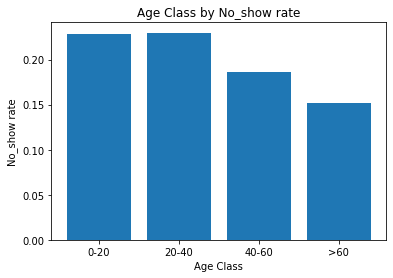

In [102]:
# Create a bar chart with proper labels
locations = [1, 2,3,4]
heights = age_class_no_show
labels = ['0-20','20-40','40-60','>60']
plt.bar(locations, heights, tick_label=labels)
plt.title('Age Class by No_show rate')
plt.xlabel('Age Class')
plt.ylabel('No_show rate');


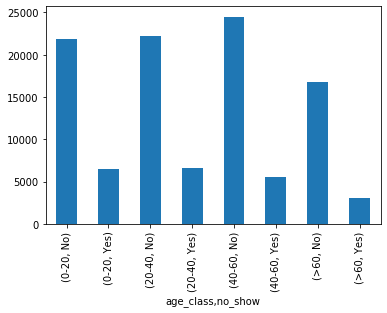

In [126]:
age_class_gpo.plot(kind='bar')

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [31]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!